<a href="https://colab.research.google.com/github/eldadHaber/CompGeoCourse/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import math


**Solving ODE's**

1. (20pts) Solve the ODE
   $y' - y = x\exp(x) \quad y(0) = 2$

2. (20pts) What type of solution does the following ODE have
$ y''' + y'' + 3y' +3y = 0$



**Modeling with ODEs**

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order nonlinear differential equations, frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. The populations change through time according to the pair of equations:

$$ x' = \alpha x - \beta xy $$
$$ y' = \delta xy  - \gamma y $$
Here, 
$x$ is the number of prey (for example, rabbits) and
$y$ is the number of some predator (for example, foxes)

Example for reasonable parameter values are α = 1.2, β = 1.1, γ = 3.2 = δ. 
and initial conditions x = y = 0.9.

1. (10pts) Write a computer code that uses the forward Euler method to integrate the function for $t=[0,60]$ and plot the solution. Use two meshes to estimate the correctness of your solution. Why do you think the solution oscilates? Can you explain in words what it implies physically?

2. (40pts) In the next cell you are given real data for $x(t)$ and $y(t)$ for soil nematodes and chafer beetles. Nematodes are used as natural pestesides to kill the beetles. Given the data, stimate the parameters $\alpha, \beta, \gamma$ and $\delta$ by fitting the data. Assune that all the parameters are stationary (that is, they do not change in time). Plot your best fit and comment about how well you manage to fit the data.

3. (10pts) Predict the relative amount of nematodes in the next 20 days.



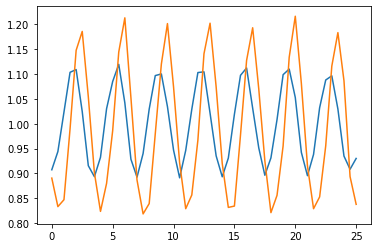

In [ ]:
# The data
# x - nematodes x 1M
# y beetle x 1M
# t time (days)

x = torch.tensor([0.9072, 0.9439, 1.0234, 1.1035, 1.1090, 1.0245, 0.9154, 0.8933, 0.9323,
        1.0302, 1.0849, 1.1195, 1.0420, 0.9284, 0.8924, 0.9400, 1.0293, 1.0969,
        1.1002, 1.0344, 0.9469, 0.8910, 0.9462, 1.0291, 1.1030, 1.1044, 1.0212,
        0.9352, 0.8931, 0.9307, 1.0190, 1.0974, 1.1122, 1.0311, 0.9513, 0.8962,
        0.9312, 1.0082, 1.0987, 1.1100, 1.0528, 0.9421, 0.8953, 0.9381, 1.0322,
        1.0880, 1.0964, 1.0296, 0.9347, 0.9083, 0.9300])

y = torch.tensor([0.8904, 0.8330, 0.8469, 0.9896, 1.1478, 1.1858, 1.0542, 0.9010, 0.8234,
        0.8798, 0.9858, 1.1443, 1.2132, 1.0522, 0.8866, 0.8183, 0.8391, 0.9799,
        1.1201, 1.2016, 1.0743, 0.9211, 0.8288, 0.8564, 0.9669, 1.1408, 1.2024,
        1.0740, 0.9199, 0.8314, 0.8341, 0.9772, 1.1274, 1.1932, 1.0701, 0.9253,
        0.8209, 0.8557, 0.9552, 1.1337, 1.2164, 1.0808, 0.9151, 0.8288, 0.8526,
        0.9553, 1.1160, 1.1834, 1.0864, 0.8934, 0.8376])

t = torch.tensor([ 0.0000,  0.5000,  1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000,
         4.0000,  4.5000,  5.0000,  5.5000,  6.0000,  6.5000,  7.0000,  7.5000,
         8.0000,  8.5000,  9.0000,  9.5000, 10.0000, 10.5000, 11.0000, 11.5000,
        12.0000, 12.5000, 13.0000, 13.5000, 14.0000, 14.5000, 15.0000, 15.5000,
        16.0000, 16.5000, 17.0000, 17.5000, 18.0000, 18.5000, 19.0000, 19.5000,
        20.0000, 20.5000, 21.0000, 21.5000, 22.0000, 22.5000, 23.0000, 23.5000,
        24.0000, 24.5000, 25.0000])

# This is how the data looks like
plt.plot(t,x,t,y)